<a href="https://colab.research.google.com/github/tiennguyen2310/Deep-Learning/blob/main/Deep_Learning_Lesson_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Library Preparation

Make sure to Use the **latest version** of Every Library that you need.

In [ ]:
!pip install -Uqq fastai

In [ ]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

!pip install -Uqq fastai 'duckduckgo_search>=6.2'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 24.6 MB/s eta 0:00:00


#Download & Prepare the Images of Bird/Non-bird

In [ ]:
from duckduckgo_search import DDGS #DuckDuckGo has changed the api so we need to update
from fastcore.all import *

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

In [ ]:
#NB: `search_images` depends on duckduckgo.com, which doesn't always return correct responses.
#    If you get a JSON error, just try running it again (it may take a couple of tries).
urls = search_images('bird photos', max_images=1)
urls[0]

'https://images.pexels.com/photos/792416/pexels-photo-792416.jpeg?cs=srgb&dl=flight-bird-blue-792416.jpg&fm=jpg'

##Check Data for Training

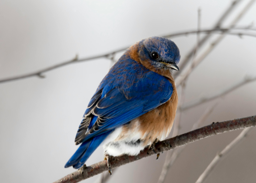

In [ ]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

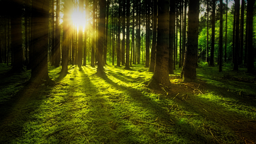

In [ ]:
download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

In [ ]:
searches = 'forest','bird'
path = Path('bird_or_not')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    #time.sleep(5)
    resize_images(path/o, max_size=400, dest=path/o) #make image smaller -> less memory -> much faster

##Delete 'Broken' Images

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

What are the things that change in the inputs/outputs from one project to another?

**1:** What kind of *inputs* (image/recording/etc.)?



**2:** What kind of *outputs* (Category/Number)?

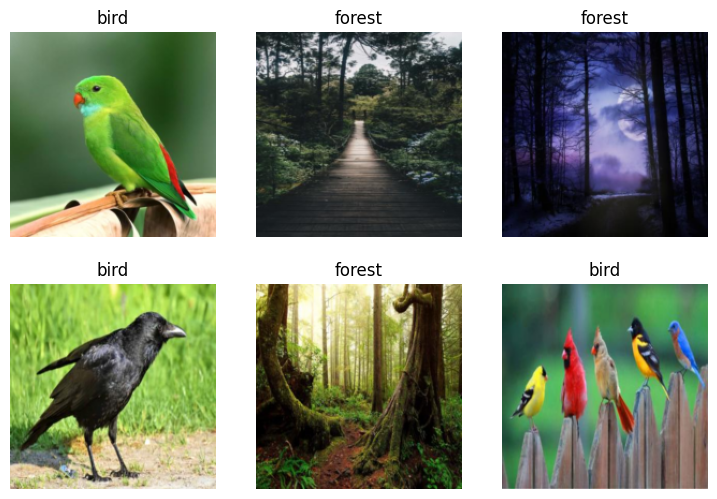

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),

    #the function in which the input images come from
    get_items=get_image_files,

    #putting aside some data to test the model - validation set of (20%)
    splitter=RandomSplitter(valid_pct=0.2, seed=42),

    #label of 'bird' or 'forest'
    get_y=parent_label,

    #transform the dataset (resize, etc.)
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

#Running the Model
A `learner` needs both the model and the dataset.

Largest Computer Vision Model Collection in the world: https://timm.fast.ai/

+ `resnet18` is a decent model.
+ We can plug in other models to try as well.


In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 133MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.492277,0.002883,0.000000,01:29


epoch,train_loss,valid_loss,error_rate,time
0,0.009399,0.000250,0.000000,02:13
1,0.007356,0.000003,0.000000,02:07
2,0.004518,0.000005,0.000000,02:07


#Use the Model to interpret images

In [ ]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 1.0000
